# Introduction to Matplotlib
## ... with the #PanamaPapers
Here we are using the dataset "sunday_times_panama_data_light.csv" which is the first ~1000 rows of the one released by the Sunday Times, accessible [here](https://cdn.rawgit.com/times/data/master/sunday_times_panama_data.zip). 

Warning: the .CSV file must be converted in UTF-8
> iconv -f iso-8859-1 -t utf-8 < sunday_times_panama_data.csv > sunday_times_panama_data_utf-8.csv
>
> head -n 1007 sunday_times_panama_data_utf-8.csv > sunday_times_panama_data_utf-8_light.csv

In [1]:
import pandas as pd

In [110]:
data = pd.read_csv('data/sunday_times_panama_data_utf-8_light.csv', encoding='utf-8')

In [28]:
import os
folder = 'data'
filename = 'sunday_times_panama_data_light.csv'
data = pd.read_csv(os.path.join(folder, filename),
                   encoding='iso-8859-1',
                   ) # for reading the first 1007 rows add this parameter: nrows=1007

In [29]:
data.head(1)

,company_url,company_name,officer_position_es,officer_position_en,officer_name,inc_date,dissolved_date,updated_date,company_type,mf_link
0,https://opencorporates.com/companies/pa/100056,OVERSEAS FINANCIAL AND INSURANCE SERVICES,agent,Legal agent,JURGEN MOSSACK,1982-11-09,1990-01-05,2016-03-17 08:19:25,SOCIEDAD ANONIMA\r,1


In [40]:
companies = data.company_name.str.upper().unique()
len(companies)

41616

In [41]:
persons = data.officer_name.str.upper().unique()
len(persons)

37348

In [ ]:
%%time
companiesNum = []
positionsNum = []
for person in persons[:10]:
    data_select = data.loc[data.officer_name.str.upper()==person]
    print(person,': ',len(data_select.company_name.unique()))
    companiesNum.append(len(data_select.company_name.unique()))
    positionsNum.append(len(data_select))

In [66]:
companiesNumTmp=companiesNum
positionsNumTmp=positionsNum
personsTmp = persons[:len(companiesNum)]

In [70]:
df = pd.DataFrame({'name':personsTmp,'positions':positionsNumTmp,'companies':companiesNumTmp})

In [75]:
df.sort('companies',ascending=False)

/Users/kwisatz/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,companies,name,positions
12,15604,MOSSACK FONSECA & CO,15609
78,13981,BUFETE MF & CO,13983
24,10945,LETICIA MONTOYA,24398
21,10557,FRANCIS PEREZ,24299
1016,9253,EL REPRESENTANTE LEGAL DE LA SOCIEDAD LO ES EL...,9253
597,8166,VERNA DE NELSON,16253
596,8047,JAQUELINE ALEXANDER,17521
791,7199,YVETTE ROGERS,19727
595,6077,CARMEN WONG,12181
26,5929,KATIA SOLANO,12870


In [82]:
data.loc[data.officer_name.str.contains('CAMERON')]

,company_url,company_name,officer_position_es,officer_position_en,officer_name,inc_date,dissolved_date,updated_date,company_type,mf_link
524719,https://opencorporates.com/companies/pa/89653,"BLAIRMORE HOLDINGS, INC.",director,Director,IAN D. CAMERON,1982-05-04,0000-00-00,2016-04-06 19:57:16,SOCIEDAD ANONIMA\r,0


In [ ]:
index = np.argsort(np.array(counts))

In [ ]:
persons[index][:10]

In [ ]:
for name in data.officer_name.unique()[:3]:
    print(name, (data.officer_name==name).sum())

In [ ]:
len(data[data.officer_name=='JURGEN MOSSACK'].company_name.unique())

In [83]:
from datetime import datetime

def days_between(d1, d2):
    if d1[4]=='-': 
        d1 = datetime.strptime(d1, "%Y-%m-%d")
    else:
        d1 = datetime.strptime(d1, "%Y/%m/%d")
    if d2[4]=='-': 
        d2 = datetime.strptime(d2, "%Y-%m-%d")
    else:
        d2 = datetime.strptime(d2, "%Y/%m/%d")
    return abs((d2 - d1).days)

In [84]:
duree = []
for company in data.company_name.unique()[:3]:
    print(company)
    subdata = data[data.company_name==company]
    d1 = subdata.iloc[0].inc_date
    d2 = subdata.iloc[0].dissolved_date
    if d2 == '0000-00-00':
        d2 = subdata.iloc[0].updated_date[:10]
    print(d1, d2, days_between(d1, d2))
    duree.append(days_between(d1, d2))

OVERSEAS FINANCIAL AND INSURANCE SERVICES
1982-11-09 1990-01-05 2614
PEPINO CORPORATION
1982-11-09 1991-01-21 2995
SOCIETE THS DE COMMERCE, S.A.
1982-11-09 2016-03-17 12182


In [85]:
duree = []
for company in data.company_name.unique():
    subdata = data[data.company_name==company]
    d1 = subdata.iloc[0].inc_date
    d2 = subdata.iloc[0].dissolved_date
    if d2 == '0000-00-00':
        d2 = subdata.iloc[0].updated_date[:10]
    duree.append(days_between(d1, d2))

In [86]:
import matplotlib.pyplot as plt

In [87]:
# Premier test
plt.figure()

In [88]:
# Oui car il faut dire tout à un ordinateur ...
plt.figure()
plt.show()

In [89]:
# Et pour voir tout ça directement dans son iPython notebook... magie!
%matplotlib inline

In [90]:
# Et voilà!
plt.figure()
plt.show()

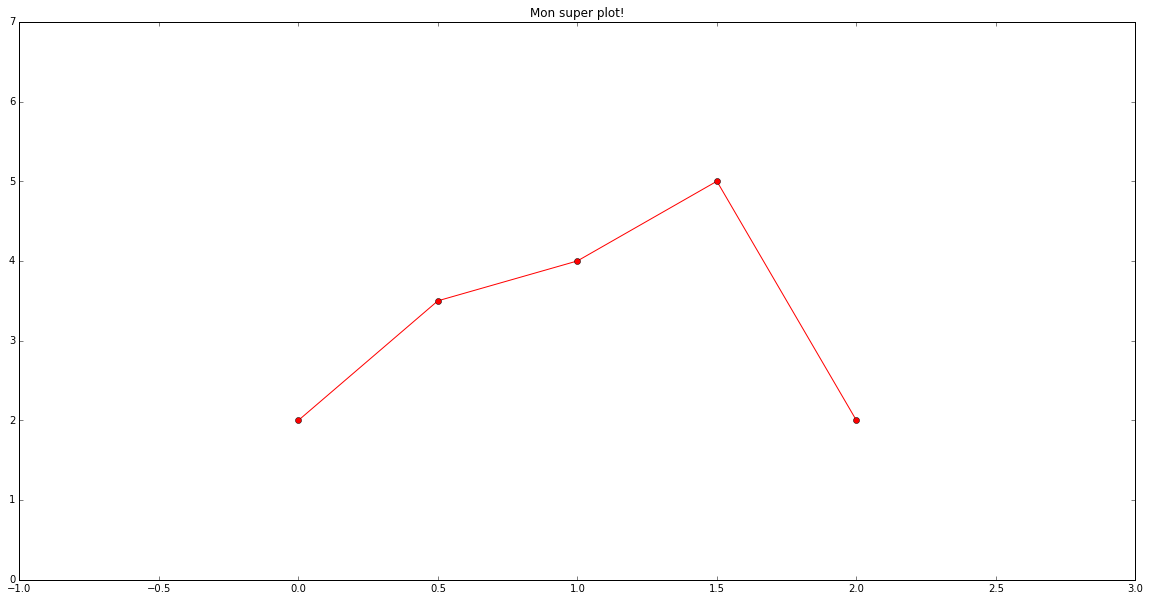

In [108]:
# C'est mieux avec quelque chose dedans...
plt.figure(figsize=[20,10])
plt.plot([0,0.5,1,1.5,2],[2,3.5,4,5,2],'o-',color='red')
plt.xlim([-1, 3])
plt.ylim([0, 7])
plt.title('Mon super plot!')
plt.savefig('test.pdf', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

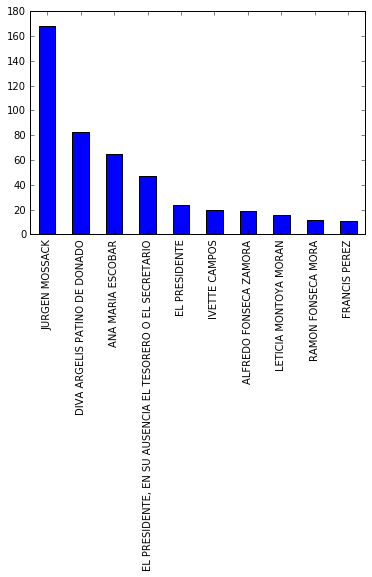

In [130]:
# Retour au Panama Papers
plt.figure()
plt.hist([(data.officer_name==name).sum() for name in data.officer_name.unique()],20)
plt.show()

In [ ]:
# Note: pandas permets aussi de faire des plots directement
pd.value_counts(data.officer_name)[:10].plot(kind='bar')

In [113]:
# Qu'en est-il des postes tenus dans les entreprises?
positions = data.officer_position_en.unique()
posNum = []
for pos in positions:
    print(pos, (data.officer_position_en==pos).sum())
    posNum.append((data.officer_position_en==pos).sum())

Legal agent 100
President/Chairman 95
Treasurer 96
Secretary 97
Director 301
Shareholder 195
Representative 82
Vice-President 19
Undersecretary 10
Director/Vice-president 2
Director/President 3
Director/Secretary 1
Director/Treasurer 3
Authorised signatory 1
Undertreasurer 2


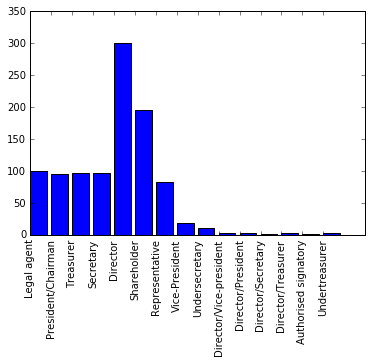

In [114]:
# Avec Matplotlib
plt.bar(range(len(positions)),posNum)
plt.xticks(range(len(positions)),positions, rotation='vertical')
plt.show()

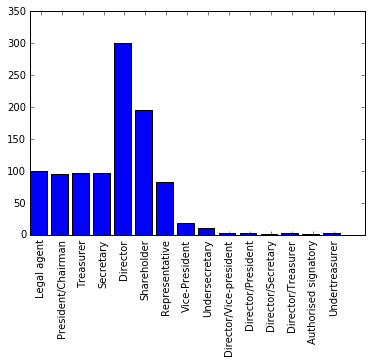

In [115]:
# Centrons les noms sur l'axe des abscises
import numpy as np
plt.figure()
plt.bar(range(len(positions)),posNum)
plt.xticks(np.arange(len(positions))+0.5,positions, rotation='vertical')
plt.show()

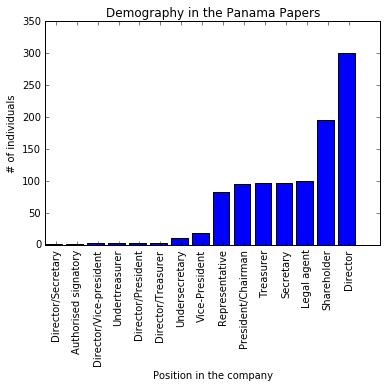

In [116]:
# On réordonne le tout ...
idx = np.argsort(posNum)
plt.bar(range(len(positions)),np.array(posNum)[idx])
plt.xticks(np.arange(len(positions))+0.5,positions[idx], rotation='vertical')
plt.ylabel('# of individuals')
plt.xlabel('Position in the company')
plt.title('Demography in the Panama Papers')
plt.show()

In [ ]:
# Avec un peu plus d'ornements ...
plt.xkcd()
plt.figure(figsize=[20,10])
plt.bar(range(len(positions)),np.array(posNum)[idx])
plt.xticks(np.arange(len(positions))+0.5,positions[idx], rotation='vertical')
plt.title('Demography of the Panama Papers')
plt.ylabel('# of people')
plt.xlabel('Positions in the company')
plt.xlim([0,len(positions)])
plt.grid()
plt.show()

In [ ]:
# Regardons maintenant l'aspect durée des companies
plt.figure()
plt.hist(duree)
plt.xticks(range(0,16000,360*5),range(0,45,5), rotation='vertical')
plt.show()

In [ ]:
# Avec un peu plus d'ornements ...
plt.xkcd()
plt.figure()
plt.figure(figsize=[20,10])
plt.hist(duree,100)
plt.ylabel('# of companies')
plt.xlabel('Years')
plt.xticks(range(0,20000,360*5),range(0,56,5), rotation='vertical')
plt.xlim([0, 360*50])
plt.title('Life expectancy of the companies in the Panama Papers')
plt.show()

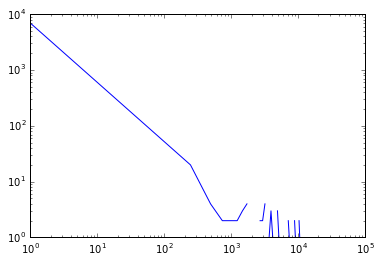

In [151]:
# Calculons la loi de puissance des panama papers!
h,b = np.histogram(positionsNumTmp,100)

plt.figure()
plt.loglog(b[:-1],h)
plt.show()

In [163]:
from scipy.stats import linregress
bl = np.log(b[:-1])
gl = np.log(h)

linregress(bl[np.isfinite(gl)],gl[np.isfinite(gl)])

LinregressResult(slope=-0.77602747681668727, intercept=7.1105969621393506, rvalue=-0.89933377612492926, pvalue=4.9299313425590901e-13, stderr=0.066699678364131224)